# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [14]:
# Your work here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [15]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


**#1. Is the distribution of body temperatures normal?**

Yes

In [16]:
n = len(df['temperature'])

M = np.mean(df['temperature'])

s = np.std(df['temperature'])

print('The sample size is: ' + str(n))
print('The sample mean is: ' + str(M))
print('The sample standard deviation is: ' + str(s))

The sample size is: 130
The sample mean is: 98.24923076923078
The sample standard deviation is: 0.7303577789050377


In [17]:
# Defining a function for an ecdf
def ecdf(data):
    
    n = len(data)
    
    x = np.sort(data)
    
    y = np.arange(1, n + 1) / n
    
    return x,y

In [19]:
# Overlay normal distribution over ecdf of data
normal = np.random.normal(M, s, size = 10000)

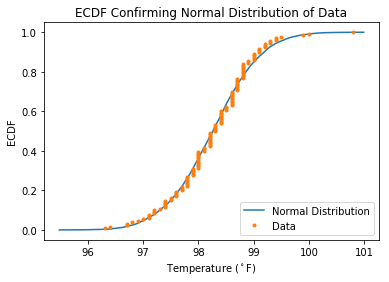

In [20]:
x_temp, y_temp = ecdf(df['temperature'])
x_normal, y_normal = ecdf(normal)

_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')

_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Normal Distribution', 'Data'), loc='lower right')
_ = plt.title('ECDF Confirming Normal Distribution of Data')

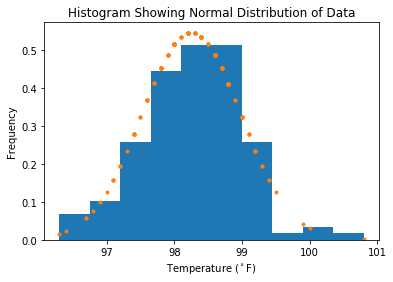

In [22]:
# Show normal distribution of data
_ = plt.hist(df['temperature'], density = True)
normfit = stats.norm.pdf(df['temperature'], M, s)
_ = plt.plot(df['temperature'], normfit, '.')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('Frequency')
_ = plt.title('Histogram Showing Normal Distribution of Data')

**#2. Is the sample size large? Are the observations independent?**

The sample size of 130 is large because it is greater than 30 for the CLT. The observations are independent because they are all taken from individual people and do not influence one another.


**#3. Is the true population mean really 98.6 degrees F?**

* Would you use a one-sample or two-sample test? Why?

It would be best to use a one-sample test because we have a set of data that we are comparing against one value.

* In this situation, is it appropriate to use the t or z statistic?

It would be best to use the t statistic because our population standard deviation is unknown, but since the sample is large it won't make a big difference here, and the null hypothesis is rejected throughout.

* Now try using the other test. How is the result different? Why?

The p-value of t-statistic test is larger than that of the z-test, meaning the t-test distribution is larger than z-test distribution.

Null Hypothesis: The true population mean is 98.6 degrees F.

Alternative Hypothesis: The true population mean is not equal to 98.6 degrees F

In [25]:
# Define bootstrap functions

def bootstrap(data, function):
    return function(np.random.choice(data, size = len(data)))

def bootstrap_replicates(data, function, size = 1):
    replicates = np.empty(size)
    for i in range(size):
        replicates[i] = bootstrap(data, function)
    return replicates

# Array of translated temperatures:
t_temps = df['temperature'] - M + 98.6

# Bootstrap replicates of translated temperatures:
t_replicates = bootstrap_replicates(t_temps, np.mean, size = 10000)

# Calculate p-value
p = np.sum(t_replicates <= M) / len(t_replicates)

print('p-value = ', p)


p-value =  0.0


The p-value associated with the bootstrap test is zero, meaning to reject the null hypothesis and implying that the true population mean is not equal to 98.6 degress Fahrenheit. 

In [26]:
#Performing z-test and calculating z and p values
# Standard error of the mean
sem = s / np.sqrt(n)
z = (M - 98.6) / sem
print('z =', z)

p_z = stats.norm.cdf(z) * 2
print('p-value =', p_z)

z = -5.475925202078116
p-value = 4.3523151658821886e-08


In [27]:
# Performing t-test and calculating t and p values
t = (M - 98.6) / (s / np.sqrt(n))
print('t =', t)

p_t = stats.t.sf(np.abs(t), n - 1) * 2
print('p-value =', p_t)

t = -5.475925202078116
p-value = 2.1887464624095175e-07


**#4. Draw a small sample of size 10 from the data and repeat both frequentist tests.**
* Which one is the correct one to use?

The t-test, because the sample size is small.

* What do you notice? What does this tell you about the difference in application of the t and z statistic?

The p-value for the z-test is significantly smaller than that of the t-test. This shows it is important to utilize the correct test based on the parameters.

In [28]:
# Drawing a random sample of 10 from the temperature data:
sample = np.random.choice(df['temperature'], size = 10)
sample

array([99.2, 99. , 98.7, 98.4, 98.5, 98.4, 99.1, 97.6, 97.1, 97.6])

In [29]:
# Performing t-test
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t = ', t)
print('p-value =', p)

t =  -1.0681034923743782
p-value = 0.3132843255276878


In [30]:
# Performing z-test
z1 = (np.mean(sample) - 98.6) / (np.std(sample) / np.sqrt(len(sample)))

print('z =', z1)

p_z1 = stats.norm.sf(abs(z)) * 2
print('p-value =', p_z1)

z = -1.125879937561108
p-value = 4.3523151658821886e-08


**#5. At what temperature should we consider someone's temperature to be "abnormal"?**

In [31]:
# Finding the margin of error
critical_z = 1.96 # z-value corresponding to a 95% confidence interval
sem 
margin_e = critical_z * sem 
print('The margin of error of the mean temperature is: ', margin_e, 'degrees F')


# 95% Confidence Interval of the mean 
confidence_i = np.percentile(df['temperature'], [2.5, 97.5])
print('95% of the data falls between the interval: ', '[', confidence_i[0], ',', confidence_i[1], ']', 'degrees F')


# 95% Prediction Interval
prediction_i = critical_z * s/np.sqrt(1)  
print('The 95% prediction interval is: ', '[', M - prediction_i, ',', M + prediction_i, ']', 'degrees F')


The margin of error of the mean temperature is:  0.125550964802579 degrees F
95% of the data falls between the interval:  [ 96.7225 , 99.4775 ] degrees F
The 95% prediction interval is:  [ 96.8177295225769 , 99.68073201588466 ] degrees F


We should consider a person's temperature to be abnormal if it falls outside of the 95% prediction interval of 96.8177295225769 to 99.68073201588466.

** #6. Is there a significant difference between males and females in normal temperature?**
* What testing approach did you use and why?

I used a two-tailed permutation test here since it compares the means of two independent samples.

* Write a story with your conclusion in the context of the original problem.

Although Carl Wunderlich reported in 1868 that the normal human body temperature is 98.6 degrees F, our analysis reflected that the actual temperture is closer to 98.2 degrees F. It is also interesting to note our significance tests showed that females have on average a .29 degree higher body temperature than men. 

In [32]:
# Separate observations for male and female
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

male_temp = males['temperature']
female_temp = females['temperature']

# Calculating difference in means for male and female temperatures
male_temp_mean = np.mean(male_temp)
female_temp_mean = np.mean(female_temp)

diff_of_means = female_temp_mean - male_temp_mean
print('The difference of means between male and female temperatures is', diff_of_means, 'degrees F')

#Null hypothesis: The distribution of temperatures for males and females is the same.
#Alternative hypothesis: The distribution of temperatures for males and females is different.

The difference of means between male and female temperatures is 0.289230769230727 degrees F


In [33]:
# Calculating Standard Error
male_temp_std = males['temperature'].std()
female_temp_std = females['temperature'].std()

SE = ((male_temp_std ** 2) / 65 + (female_temp_std ** 2 )/ 65) ** 0.5
SE

0.12655395041982642

In [34]:
# Calculating Degrees of Freedom
F1 = female_temp_std ** 2 / 65
M1 = male_temp_std ** 2 / 65

DF = ((F1 + M1) ** 2) / (((F1 **2) / 64) + ((M1 ** 2) / 64))
DF

127.5103008303909

In [35]:
# Using 0.05 Significance level in two sample t-test
t = diff_of_means / SE
print('The t-statistic is', t)

The t-statistic is 2.285434538165274


In [36]:
# Calculating the p-value
p = stats.t.sf(np.abs(2.29), 128) * 2
print('The p-value is', p)

The p-value is 0.023657711289024146


Since our p-value is less than .05 we can reject the null hypothesis and conclude that there is a statistically significant difference in temperatures for males and females.